In [7]:
# --- Imports ---
import sys, os
sys.path.append(os.path.abspath(".."))

import matplotlib.pyplot as plt
from collections import Counter

from src import load_bcn20000

# HuggingFace datasets returns dict-like objects

In [8]:
# --- Load dataset ---
# By default, load training split
dataset = load_bcn20000(split="train")

print(dataset)
print(dataset.features)

Dataset({
    features: ['image', 'label', 'image_path'],
    num_rows: 12413
})
{'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['female', 'male', 'nan']), 'image_path': Value('string')}


In [9]:
# --- Check dataset structure ---
print("Number of samples:", len(dataset))
print("Features:", dataset.column_names)

# Peek at one example
example = dataset[0]
print(example)

Number of samples: 12413
Features: ['image', 'label', 'image_path']
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x13D8B4770>, 'label': 1, 'image_path': '/Users/kornel/.cache/kagglehub/datasets/pasutchien/bcn20000/versions/1/BCN_20k_train/bcn_20k_train/BCN_0000000001.jpg'}


Label counts: Counter({1: 6499, 0: 5840, 2: 74})


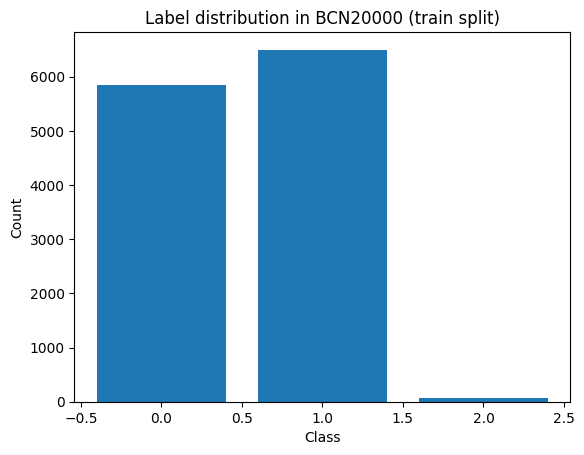

In [10]:
# --- Label distribution ---
labels = [example["label"] for example in dataset]
label_counts = Counter(labels)

print("Label counts:", label_counts)

plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Label distribution in BCN20000 (train split)")
plt.show()

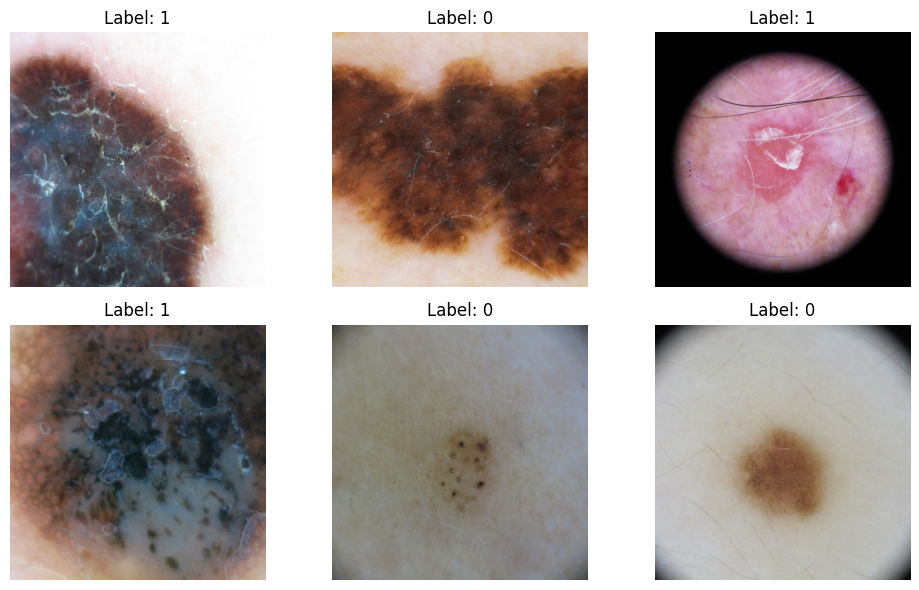

In [11]:
# --- Visualize sample images ---
# HuggingFace dataset stores images as PIL.Image objects
num_samples = 6
fig, axes = plt.subplots(2, 3, figsize=(10, 6))

for i, ax in enumerate(axes.flat):
    sample = dataset[i]
    image = sample["image"]
    label = sample["label"]

    ax.imshow(image)
    ax.set_title(f"Label: {label}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [12]:
# --- Explore splits ---
train_set = load_bcn20000(split="train")
val_set = load_bcn20000(split="validation")
test_set = load_bcn20000(split="test")

print("Train samples:", len(train_set))
print("Validation samples:", len(val_set))
print("Test samples:", len(test_set))

Train samples: 12413
Validation samples: 1240
Test samples: 6501
